# **KAGGLE**

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/house', width=700, height=500)

# Load the train data

Firstly, we must load the dataset. We use [Pandas](https://pandas.pydata.org/) . I load the dataset and convert the categorical non numeric features into numeric ones.

In [49]:
data = pd.read_csv("X_train.csv", encoding="utf8")

In [50]:
macro=pd.read_csv("macro.csv", encoding="utf8")

In [51]:
train_data=pd.merge_ordered(data, macro, on='timestamp', how='left')

In [52]:
X_numeric = train_data.select_dtypes(exclude=['object'])

In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(X_numeric.dtypes)

id                                              int64
full_sq                                         int64
life_sq                                       float64
floor                                         float64
max_floor                                     float64
material                                      float64
build_year                                    float64
num_room                                      float64
kitch_sq                                      float64
state                                         float64
area_m                                        float64
raion_popul                                     int64
green_zone_part                               float64
indust_part                                   float64
children_preschool                              int64
preschool_quota                               float64
preschool_education_centers_raion               int64
children_school                                 int64
school_quota                

how much houses?

In [54]:
X_numeric.id.unique().shape

(21329,)

how much features?

In [55]:
X_numeric.columns.shape

(372,)

Print data description

In [56]:
f = open("data_description.txt", "r")
print(f.read()) 

price_doc: sale price (this is the target variable)
id: transaction id
timestamp: date of transaction
full_sq: total area in square meters, including loggias, balconies and other non-residential areas
life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
floor: for apartments, floor of the building
max_floor: number of floors in the building
material: wall material
build_year: year built
num_room: number of living rooms
kitch_sq: kitchen area
state: apartment condition
product_type: owner-occupier purchase or investment
sub_area: name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

full_all: subarea population
male_f, female_f: subarea population by gender
young_*: population younger than working age
work_*: working-age population
ekder_*: retirement

## Extract the target

In [57]:
y = train_data['price_doc']

# Features analysis

how much NaN value are there?

In [58]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print (X_numeric.isnull().mean())

id                                            0.000000
full_sq                                       0.000000
life_sq                                       0.210793
floor                                         0.005439
max_floor                                     0.315017
material                                      0.315017
build_year                                    0.448450
num_room                                      0.315017
kitch_sq                                      0.315017
state                                         0.445403
area_m                                        0.000000
raion_popul                                   0.000000
green_zone_part                               0.000000
indust_part                                   0.000000
children_preschool                            0.000000
preschool_quota                               0.220076
preschool_education_centers_raion             0.000000
children_school                               0.000000
school_quo

In [59]:
X=X_numeric.drop(columns=['price_doc','id'])

In [60]:
X.head(19)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.032047e+07,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.787424e+06,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,5.235177e+07,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,38,19.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,7.632940e+06,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,43,28.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.235177e+07,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


How many remaining features?

In [61]:
X.columns.shape

(370,)

With KNN algorithm I will correct the remaining NaN values

In [62]:
from sklearn.impute import KNNImputer,SimpleImputer
#imputer = KNNImputer(n_neighbors=3,missing_values=np.nan)
imputer=SimpleImputer()
imputer.fit(X)
X_i=imputer.transform(X)

In [63]:
X_i.shape

(21329, 370)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_i)
X_s=scaler.transform(X_i)

In [65]:
X_s

array([[-2.60167033e-01, -1.36116920e-01, -6.90522627e-01, ...,
        -2.85272496e+00, -5.83380163e+00,  2.63226860e-01],
       [-4.69013711e-01, -2.83504862e-01, -8.78646233e-01, ...,
        -2.85272496e+00, -5.83380163e+00,  2.63226860e-01],
       [-2.60167033e-01, -9.92699340e-02, -1.06676984e+00, ...,
        -2.85272496e+00, -5.83380163e+00,  2.63226860e-01],
       ...,
       [-1.67346287e-01, -8.08464411e-02,  2.88382589e+00, ...,
         4.79989119e-15,  1.99059160e-15,  1.80685894e+00],
       [ 4.15003909e-02, -9.92699340e-02,  1.00258983e+00, ...,
         4.79989119e-15,  1.99059160e-15,  1.80685894e+00],
       [-5.13203549e-02,  0.00000000e+00,  1.00258983e+00, ...,
         4.79989119e-15,  1.99059160e-15,  1.80685894e+00]])

In [66]:
X_new=X_s

# Model Selection

In [67]:
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


models = OrderedDict([
          ('Knn', KNeighborsRegressor(weights='distance')),
          ('Logistic Regression', LogisticRegression()),
          ('Linear Regression', LinearRegression(fit_intercept=True,normalize=True)),
          ('Ridge', Ridge(fit_intercept=True,normalize=True)),
          ('Lasso', Lasso()),  
          ('Tree', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor()),
          ('Boosting', GradientBoostingRegressor())
          ])


def training(X,y,model='Logistic Regression'):
    scorers='neg_mean_squared_error'
    cv=5
    if model=='Knn':
        n_neighbors=[1,2,3,4,5,10,20,30]
        knn=models[model]
        gs = GridSearchCV(knn,param_grid={"n_neighbors": n_neighbors},scoring=scorers,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Logistic Regression':
        C  = np.logspace(-3,2,5)
        lr = models[model]
        gs = GridSearchCV(lr,param_grid={"C": C},scoring=scorers,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Ridge':
        alpha  = np.logspace(0,1,5)
        lr = models[model]
        gs = GridSearchCV(lr,param_grid={"alpha": alpha},scoring=scorers,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Lasso':
        alpha  = np.logspace(0,5,5)
        lr = models[model]
        gs = GridSearchCV(lr,param_grid={"alpha": alpha},scoring=scorers,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Tree':
        max_depth=[30,40,50,100]
        rt=models[model]
        gs = GridSearchCV(rt,param_grid={"max_depth": max_depth},scoring=scorers,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Random Forest':
        max_depth=np.arange(1,100,10)
        n_estimators=np.arange(3,21,3)
        rf=models[model]
        gs = GridSearchCV(rf,param_grid={"max_depth": max_depth,"n_estimators": n_estimators},scoring=scorers,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_
    
    if model=='Boosting':
        max_depth=np.arange(1,100,10)
        n_estimators=np.arange(3,21,3)
        br=models[model]
        gs = GridSearchCV(br,param_grid={"max_depth": max_depth,"n_estimators": n_estimators},scoring=scorers,cv=cv,n_jobs=-3,verbose=2)
        gs.fit(X, y)
        return gs, gs.best_params_, gs.best_score_

Split data in test and train

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y,random_state=42)

## K nearest neighbours

In [69]:
mm,bp,bs=training(X_train,np.log1p(y_train),'Knn')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  33 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-3)]: Done  40 out of  40 | elapsed:  5.4min finished


In [70]:
y_pred = mm.predict(X_test)
print('mse = ',mean_squared_error(np.log1p(y_test), y_pred))
print('mae = ',mean_absolute_error(np.log1p(y_test), y_pred))

mse =  0.2825028339211189
mae =  0.34689494332471904


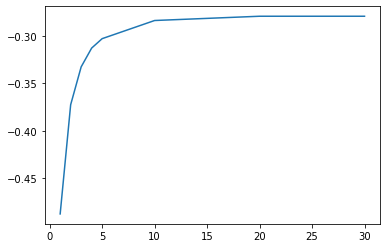

In [71]:
plt.plot([1,2,3,4,5,10,20,30],mm.cv_results_['mean_test_score'])

In [72]:
print (bp)

{'n_neighbors': 20}


In [73]:
best_knn=mm.best_estimator_
best_knn.fit(X_new,np.log1p(y))
scores=cross_val_score(best_knn, X_new, np.log1p(y), cv=5,scoring=make_scorer(mean_squared_error))
print("mse: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

mse: 0.29 (+/- 0.12)


## Ridge Regression

In [74]:
mm,bp,bs=training(X_train,np.log1p(y_train),'Ridge')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  25 out of  25 | elapsed:    2.7s finished


In [75]:
y_pred = mm.predict(X_test)
print('mse = ',mean_squared_error(np.log1p(y_test), y_pred))
print('mae = ',mean_absolute_error(np.log1p(y_test), y_pred))

mse =  0.3451783665347645
mae =  0.3379802760892699


In [76]:
print (bp)

{'alpha': 1.7782794100389228}


In [77]:
best_rr=mm.best_estimator_
best_rr.fit(X_i,np.log1p(y))

Ridge(alpha=1.7782794100389228, normalize=True)

In [78]:
lin=LinearRegression(fit_intercept=True,normalize=True)
lin.fit(X_i, np.log1p(y))

LinearRegression(normalize=True)

# Prepare the solution

In [79]:
tdata = pd.read_csv("X_test.csv", encoding="utf8")

In [80]:
test_data=pd.merge_ordered(tdata, macro, on='timestamp', how='left')

In [81]:
X_test_numeric = test_data.select_dtypes(exclude=['object'])

In [82]:
X_testf=X_testf.drop(columns=['id'])

KeyError: "['id'] not found in axis"

In [ ]:
X_testi=imputer.transform(X_testf)

In [ ]:
X_testi.shape

In [ ]:
X_tests=scaler.transform(X_testi)

In [ ]:
y_pred = lin.predict(X_tests)

In [ ]:
solution = pd.DataFrame({"id":test_data.id.unique(), 'price_doc':np.expm1(y_pred)})
solution.head(20)

In [ ]:
solution.to_csv("solution_rr.csv", index=False)